# **PROJETO SEMANTIX: PREVISÃO DE EMPRÉSTIMO**
---
---

Esse caderno Jupyter trata-se de uma projeto colaborativo entre a Escola Britânica de Artes Criativas & Tecnologia (EBAC) e a Semantix.

A proposta do projeto é:
>Encontrar uma problemática da vida real que possa ser solucionada através de análise de dados e machine learning. A ideia do projeto é explanar e justificar a relevância do uso de dados para encontrar a solução.

Developer: Davi Dutra Ferreira

## **1.Introdução**


O setor financeiro é um dos pilares mais fortes e fundamentais da economia global. Ele engloba uma vasta gama de atividades, desde a concessão de empréstimos até o investimento, seguros e serviços bancários. Com a crescente complexidade das finanças modernas, a necessidade de tomar decisões rápidas e precisas se tornou essencial para garantir a estabilidade e o crescimento dos negócios. As instituições financeiras, como bancos, cooperativas de crédito e plataformas de empréstimos, lidam com grandes volumes de dados e precisam constantemente avaliar e mitigar riscos, ao mesmo tempo em que buscam maximizar a rentabilidade.

Portanto, estou propondo um modelo de predição de empréstimo que utiliza técnicas de aprendizado de máquina para avaliar a probabilidade de aprovação ou inadimplência de um solicitante. Esse modelo ajudará as instituições financeiras a tomar decisões mais rápidas e precisas, reduzindo riscos e melhorando a eficiência operacional.

Ao analisar dados como histórico de crédito, renda e outros fatores relevantes, o modelo oferece uma maneira objetiva de calcular o risco de cada empréstimo, permitindo personalizar ofertas e otimizar a rentabilidade.

### 1.1.Dataset

Estamos utilizando um dataset disponibilizado pelo o Kaggle para análise de empréstimos.

Este conjunto de dados é uma versão sintética inspirada no conjunto de dados  [Credit Risk do Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset) e enriquecida com variáveis adicionais baseadas em [Financial Risk for Loan Approval data](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval). O SMOTENC, técnica de sampling a fim de mitigar desbalanceamento, foi usado para simular novos pontos de dados para ampliar as instâncias. O conjunto de dados é estruturado para recursos categóricos e contínuos.

Link para o Dataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?resource=download

### 1.2.Metadados

|Variável|Tipo|Descrição|
|-|-|-|
|person_age|float|Idade da pessoa.|
|person_gender|categórica|Gênero da pessoa.|
|person_education|categórica|Nível escolar.|
|person_income|float|Renda anual.|
|person_emp_exp|int|Anos de experiência profissional.|
|person_home_ownership|float|Situação de propriedade da casa (por exemplo: alugado, próprio, hipotecado)|
|loan_intent|categórica|Finalidade do empréstimo.|
|loan_int_rate|float|Taxa de juros do empréstimo.|
|loan_percent_income|float|porcentagem do empréstimo em relação a renda anual.|
|cb_person_cred_hist_length|float|Duração do histórico de crédito em anos.|
|credit_score|int|Score de crédito da pessoa.|
|previous_loan_defaults_on_file|categórica( binário)|Indicador de empréstimos anteriores.|
|**loan_status** `target`|Booleana|1=aprovado, 0=rejeitado|


## **2.Importações**

### 2.1.Importando Bibliotecas

**Pandas:** Biblioteca para operação com dados estruturados, como series e dataframes.

**Numpy:** Biblioteca matemática avançada do Python, muito utilizada para operações com vetores.

**MatPlotLib:** Biblioteca de visualização de gráficos.

**SeaBorn:** Biblioteca de visualização de gráficos.

**SKLearn:** Biblioteca para aprendizado de máquina.

**Time:** Biblioteca que retorna tempo de operações.


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np


#modelos de classificação
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, StackingClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

### 2.2.Importando Dataset

In [82]:
df = pd.read_csv('loan_data.csv')

In [83]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [84]:
df.shape

(45000, 14)

* **Quantidade de linhas:** 45000
* **Quantidade de colunas:** 14

## **3.Explorando o Dataset**

### 3.1.Análise Descritiva Básica Univariada

#### 3.1.1.Variáveis Categóricas

<ipython-input-85-32254a573472>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


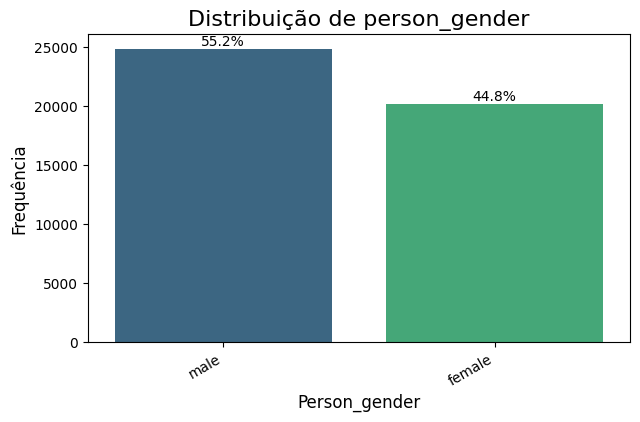

<ipython-input-85-32254a573472>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


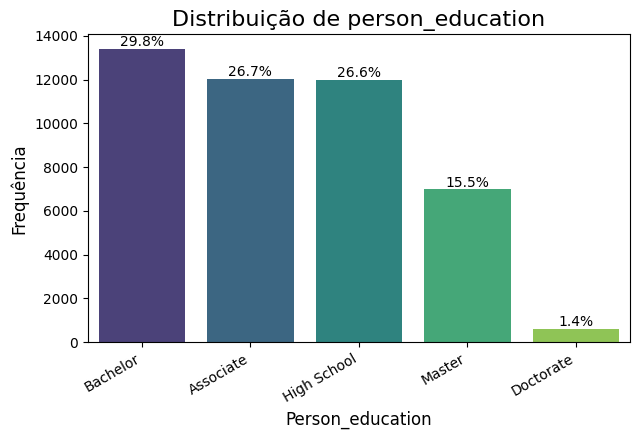

<ipython-input-85-32254a573472>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


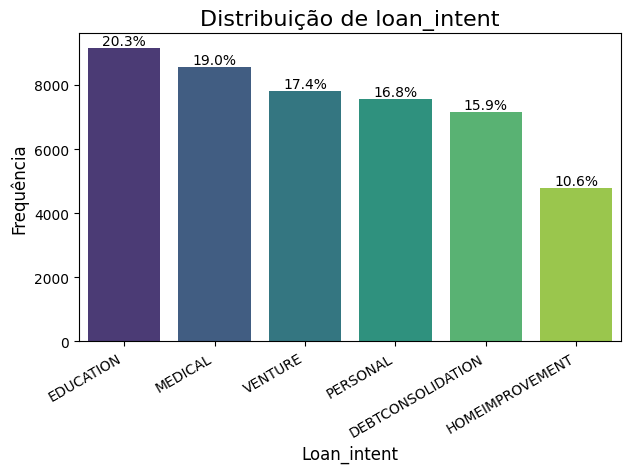

<ipython-input-85-32254a573472>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


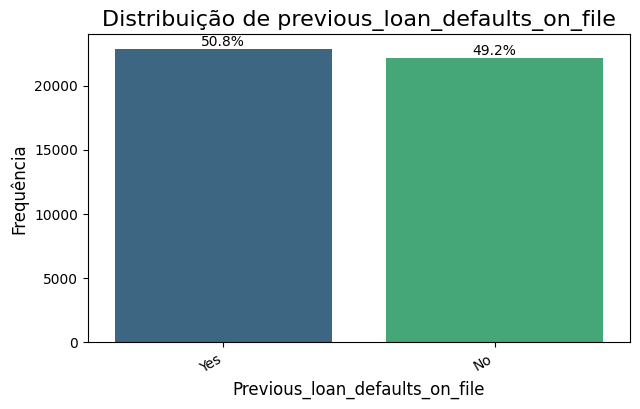

In [85]:
#lista das variáveis categóricas
categoricas = ['person_gender', 'person_education', 'loan_intent', 'previous_loan_defaults_on_file']

#loop para plotagem de gráficos
for col in categoricas:
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)

    total = len(df[col])
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.1f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Distribuição de {col}", fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.xticks(rotation=30, ha='right')
    plt.show()

* É uma base, no geral, bem balanceada quanto a distribuição de categorias.
* Algo interessante a se notar é na variável de finalidade do empréstimo, onde as categorias mais frequentes são para gastos educacionais e médicos. O que provavelmente seria diferente se fosse no Brasil, que tem serviços de saúde e universidade gratuitos.

#### 3.1.2.Variáveis Numéricas

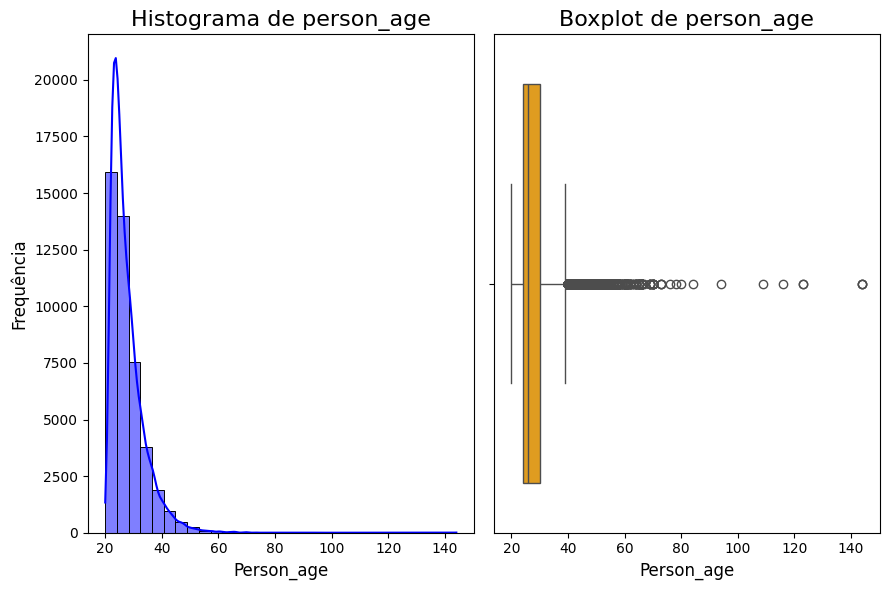

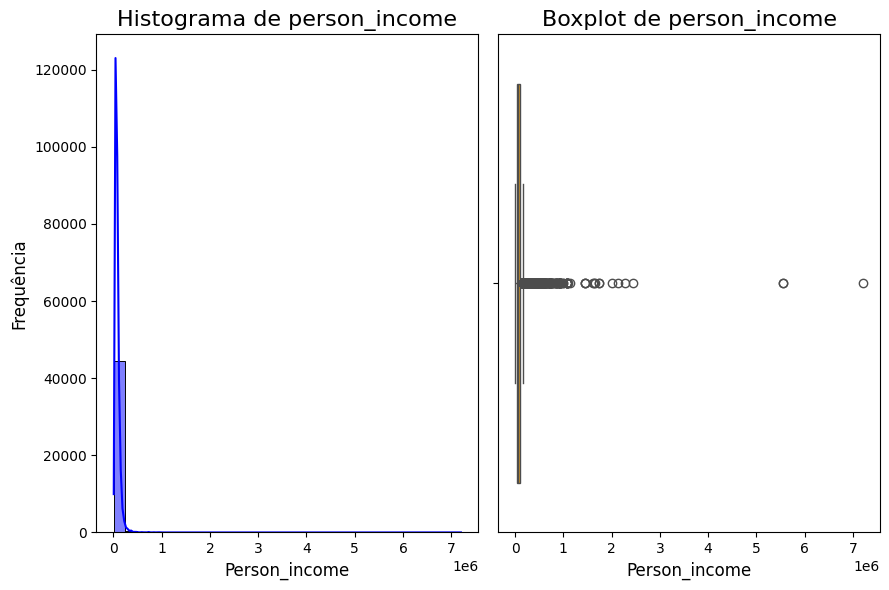

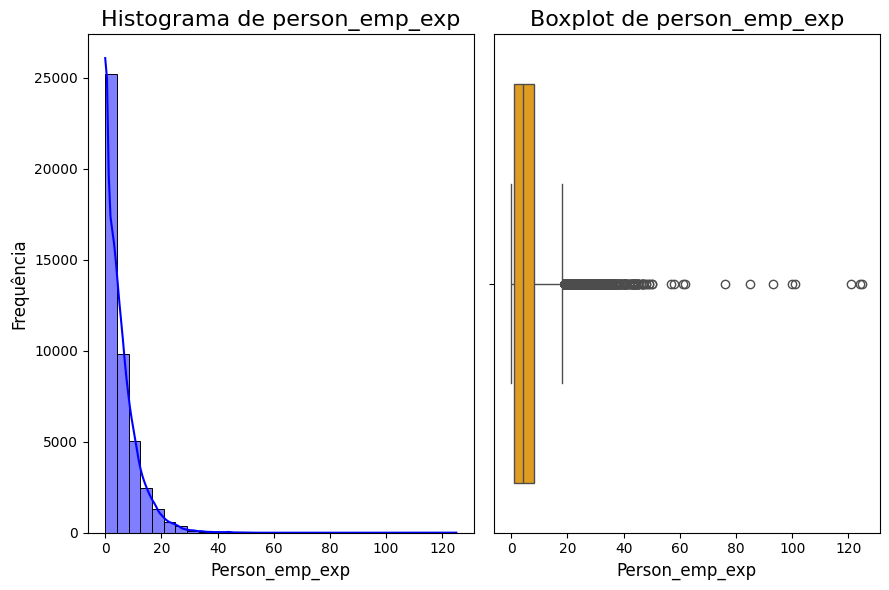

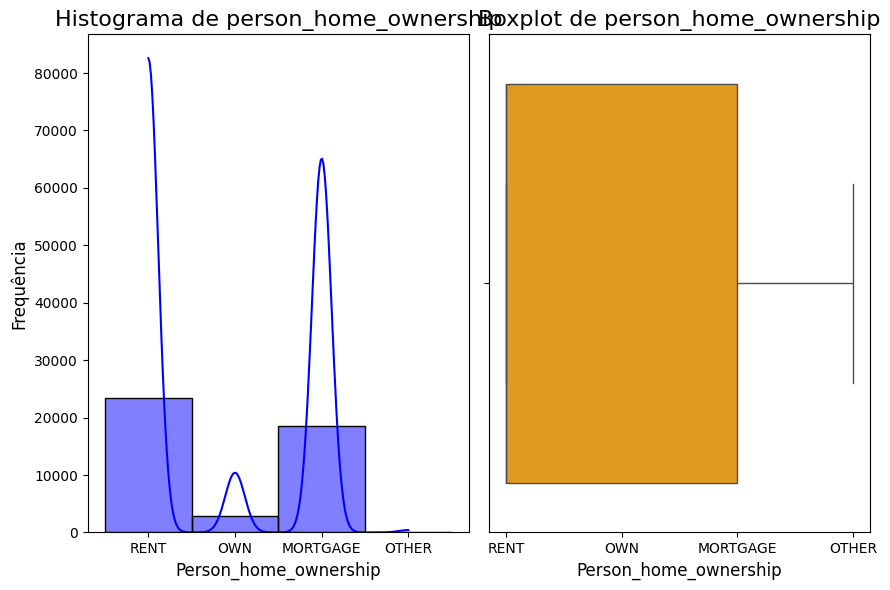

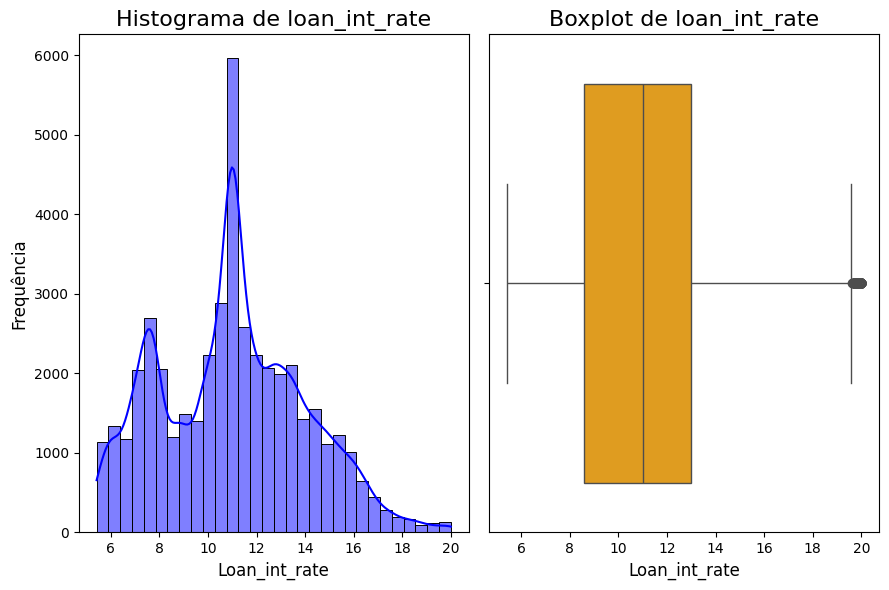

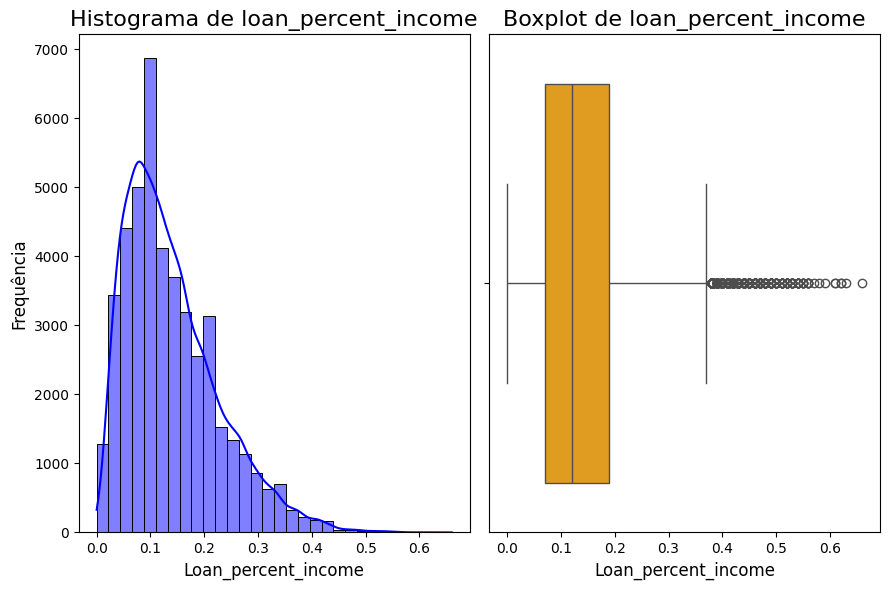

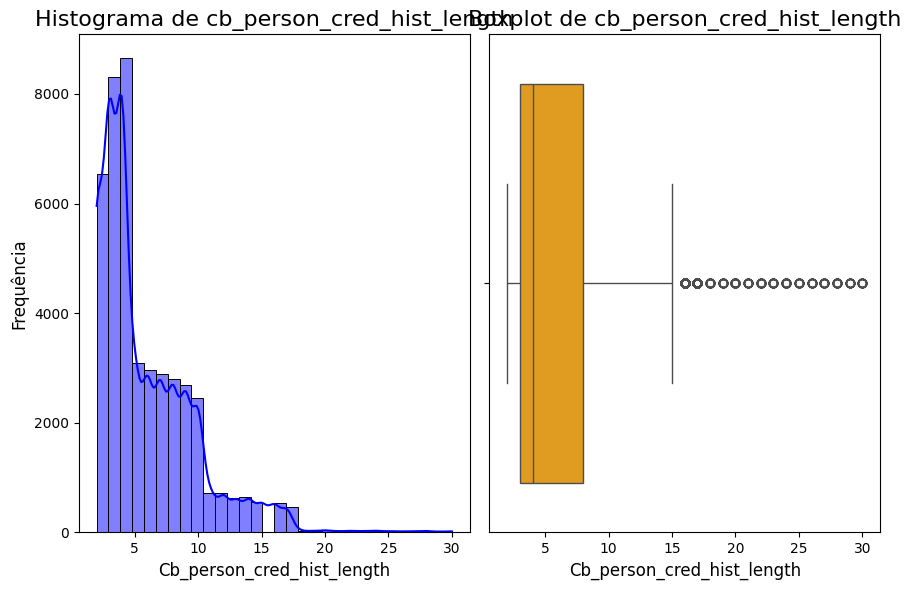

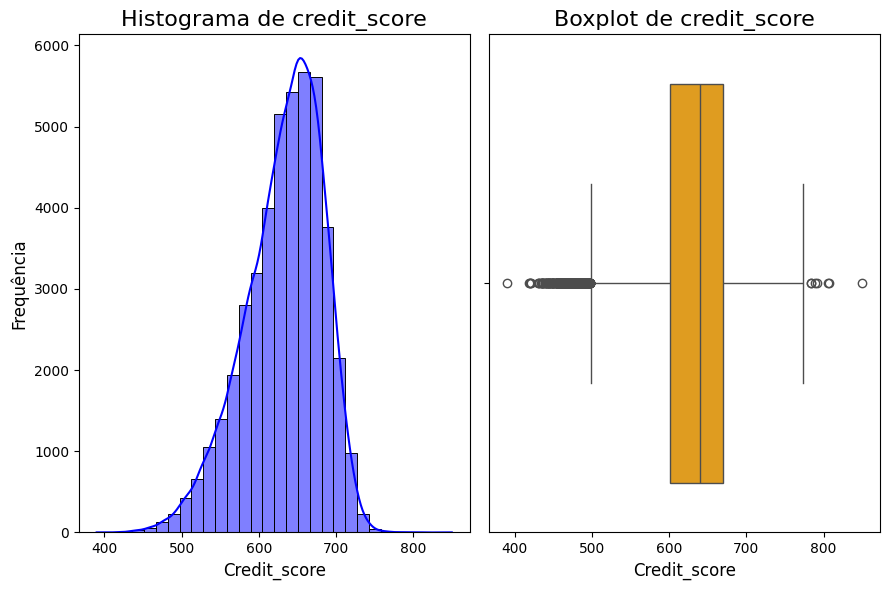

In [86]:
#lista das variáveis numéricas
numericas = ['person_age', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for col in numericas:
    plt.figure(figsize=(9, 6))

    # Histograma com KDE (curva de densidade)
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, color="blue", bins=30)
    plt.title(f"Histograma de {col}", fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel("Frequência", fontsize=12)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, color="orange")
    plt.title(f"Boxplot de {col}", fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=12)

    plt.tight_layout()
    plt.show()

* Temos muitos outliers, podemos averiguar e fazer algum tratamento.
* A maioria das pessoas que tiveram um empréstimo antes, quitaram nos primeiros 5 anos.
* Como essa é uma base de solitação de empréstimos, podemos ver um comportamento bem interessante na variável de tipo de casa. Onde, a maioria das pessoas vivem de aluguel ou hipotecaram a sua, o que pode indicar endividamento.

#### 3.1.3. Variável Target

<ipython-input-87-5e5db97a5fc1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='loan_status', palette="viridis", order=df['loan_status'].value_counts().index)


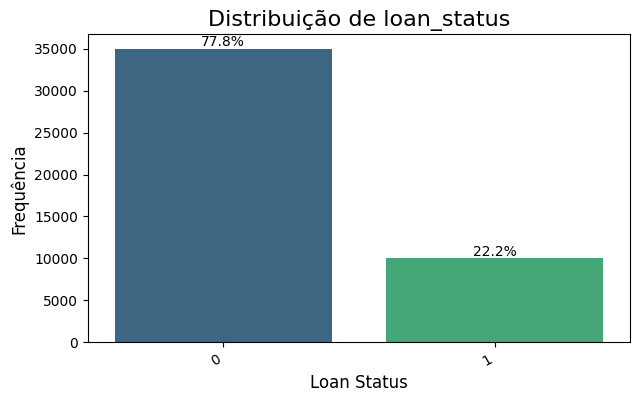

In [87]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='loan_status', palette="viridis", order=df['loan_status'].value_counts().index)

total = len(df['loan_status'])
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"

    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title("Distribuição de loan_status", fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()

Embora a base tenha tido um pré-processamento de sampling para mitigar o desbalanceamento, ela continua sendo uma base desbalanceado. Entretanto, não tanto.

### 3.2.Análise Descritiva Bivariada

#### 3.2.1.Em Relação a Variável Target

##### 3.2.1.1.Variáveis Categóricas

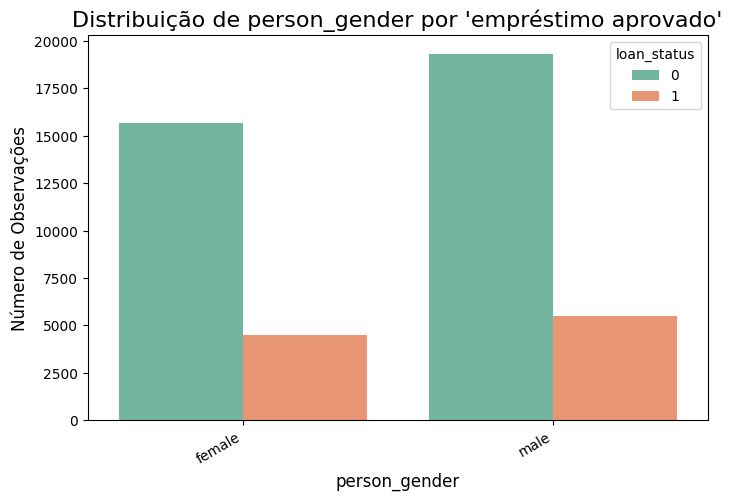

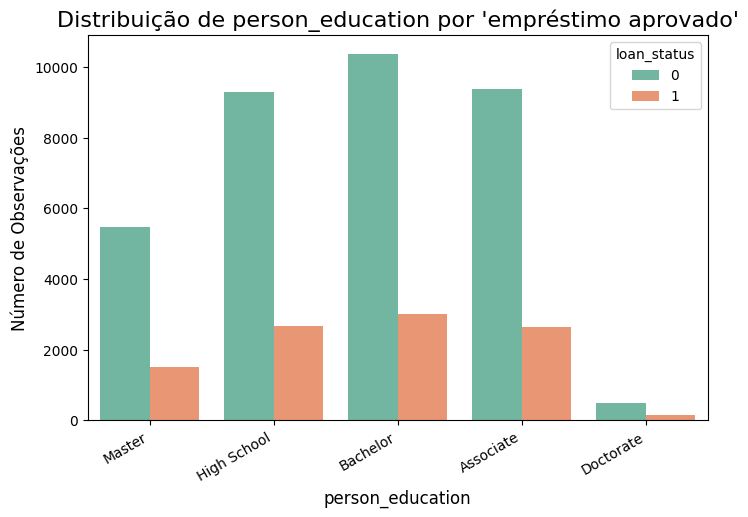

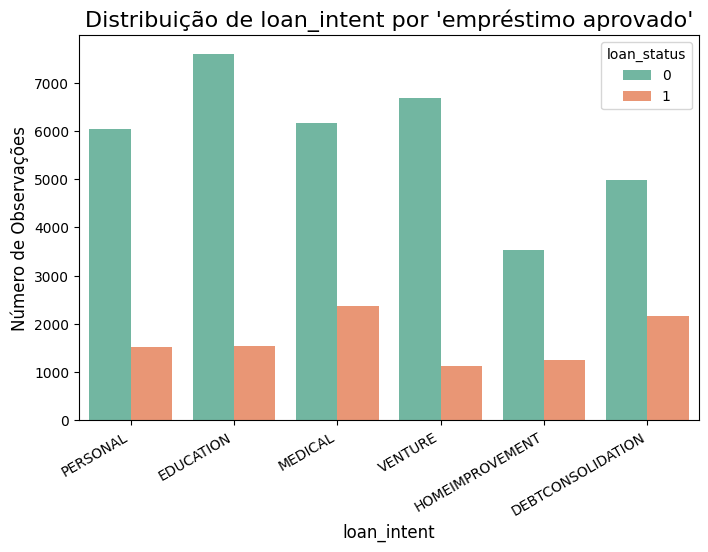

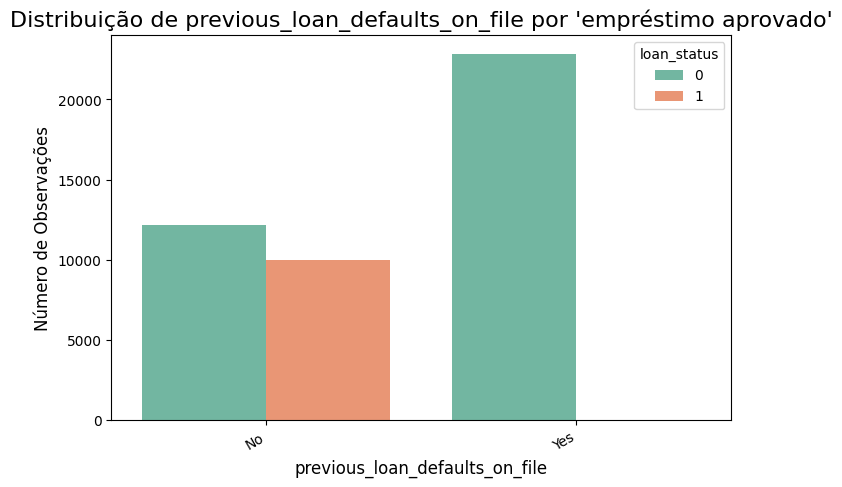

In [88]:
for var in categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var, hue='loan_status', palette="Set2")
    plt.title(f"Distribuição de {var} por 'empréstimo aprovado'", fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Número de Observações', fontsize=12)
    plt.xticks(rotation=30, ha='right')
    plt.show()

* A aprovação de empréstimos é maior nas pessoas com doutorado, o que indica que são pessoas que scoring maior que as demais categorias, por já estarem no mais alto nível acadêmico com carreiras consolidadas.
* Pessoas que já possuiam histórico de empréstimos, foram todas recusadas. Essa é provavelmente um variável muito determinante.

3.2.1.2.Variáveis Numéricas

<ipython-input-89-147d031dd478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")


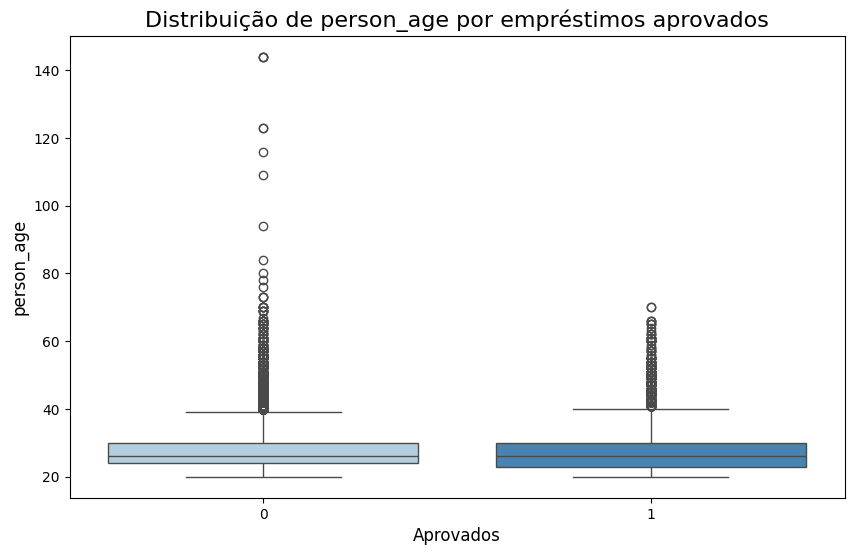

<ipython-input-89-147d031dd478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")


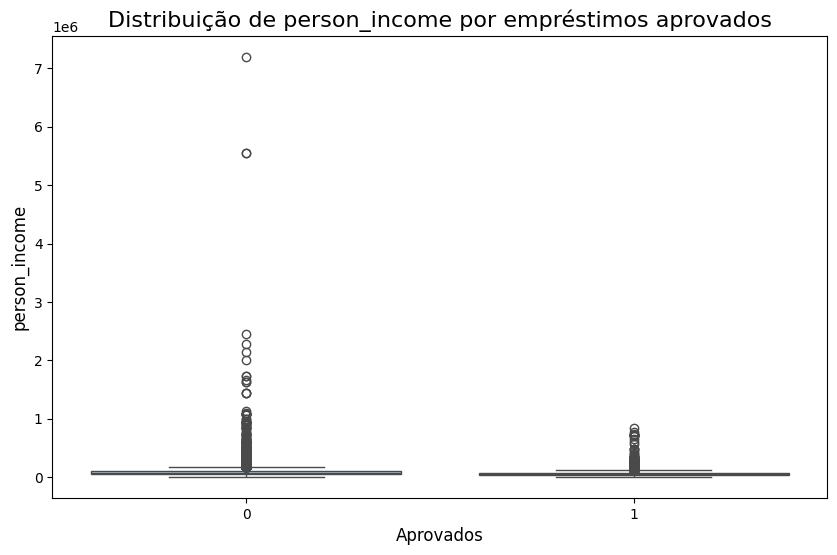

<ipython-input-89-147d031dd478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")


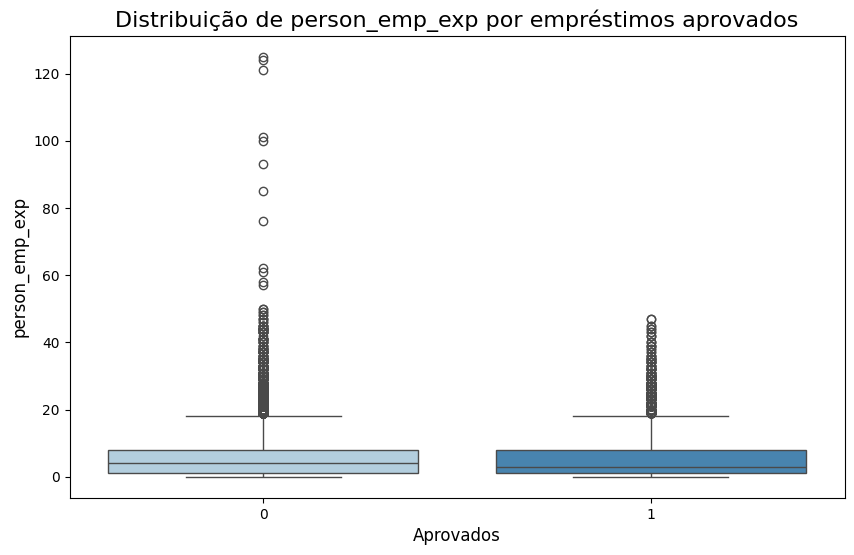

<ipython-input-89-147d031dd478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")


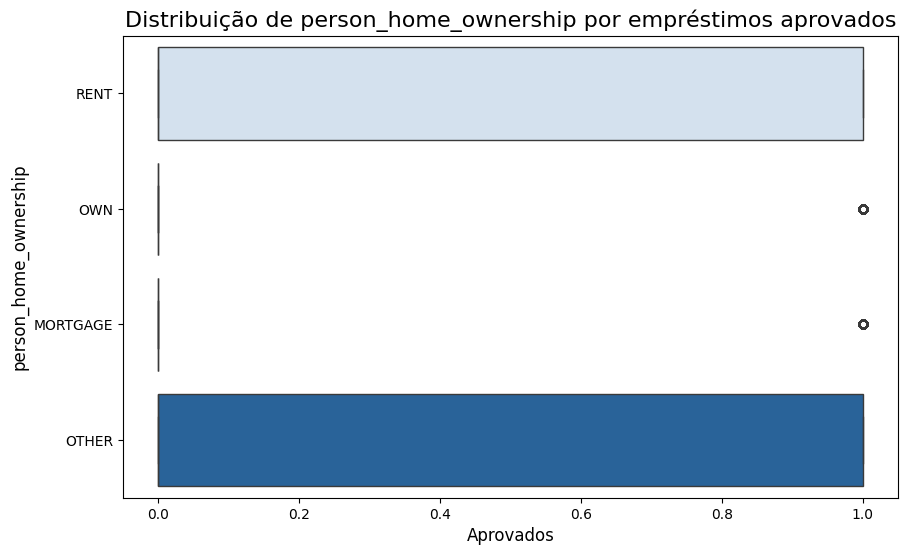

<ipython-input-89-147d031dd478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")


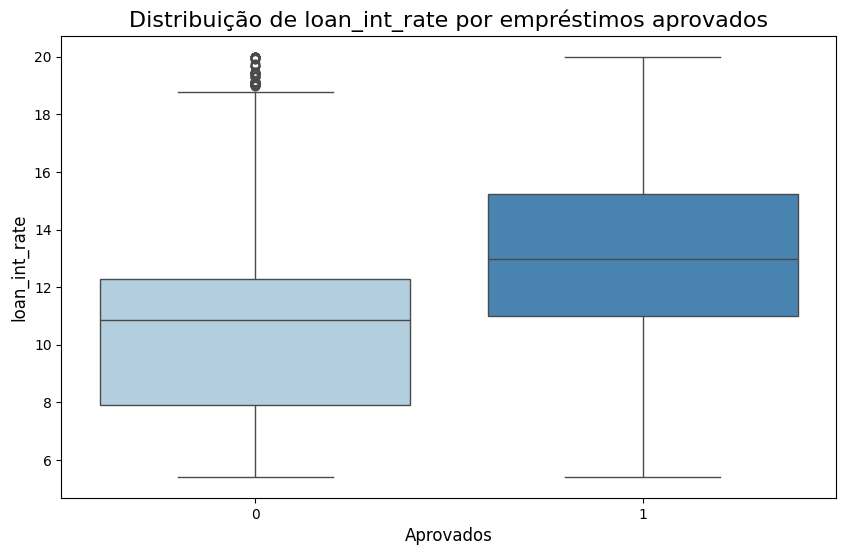

<ipython-input-89-147d031dd478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")


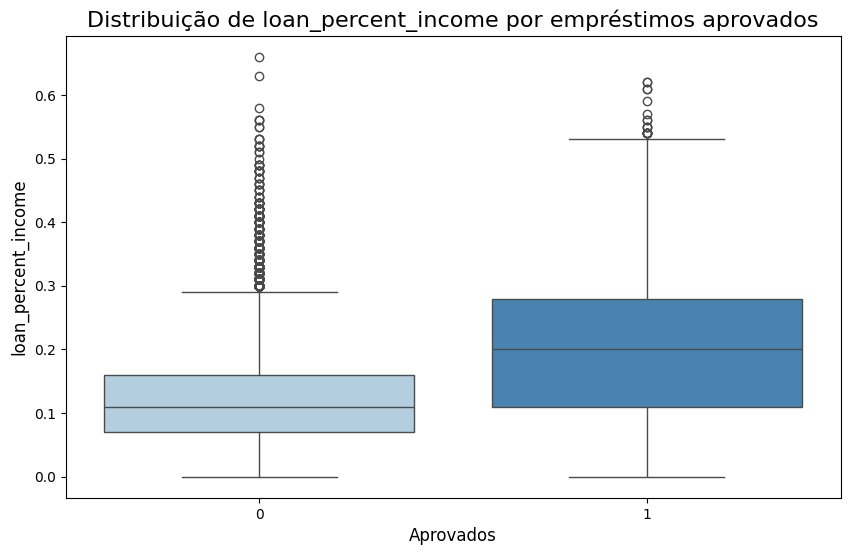

<ipython-input-89-147d031dd478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")


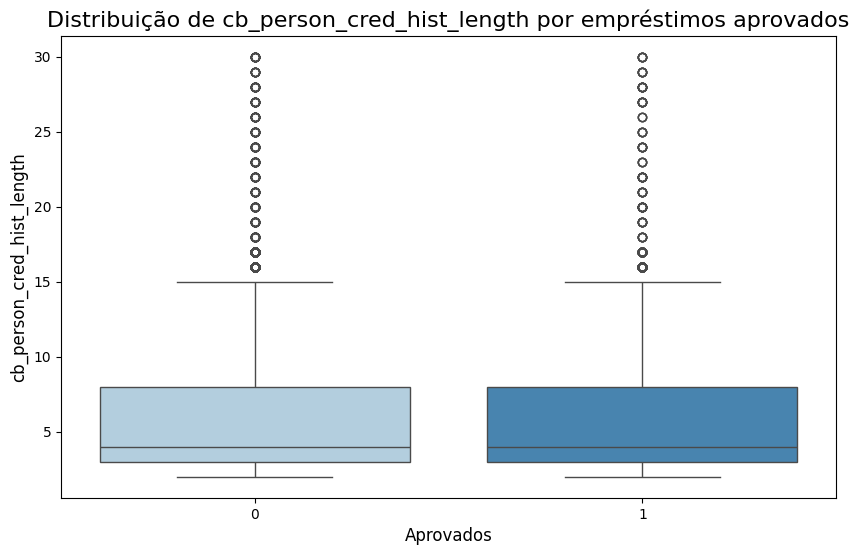

<ipython-input-89-147d031dd478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")


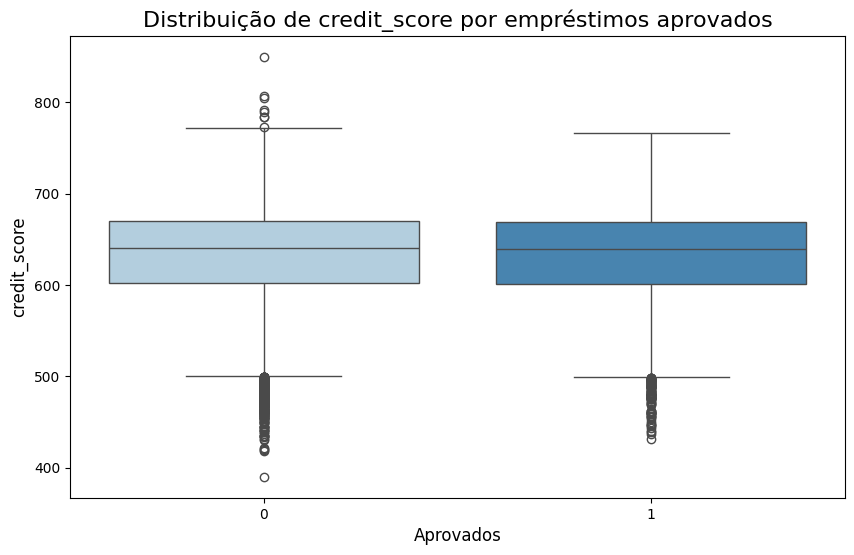

In [89]:
for var in numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='loan_status', y=var, palette="Blues")
    plt.title(f"Distribuição de {var} por empréstimos aprovados", fontsize=16)
    plt.xlabel('Aprovados', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.show()

#### 3.2.2.Outras Análises

##### 3.2.2.1.Nível Escolaridade x Renda Anual

<ipython-input-90-eb22c9b86fc1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='person_education', y='person_income', palette='Set2')


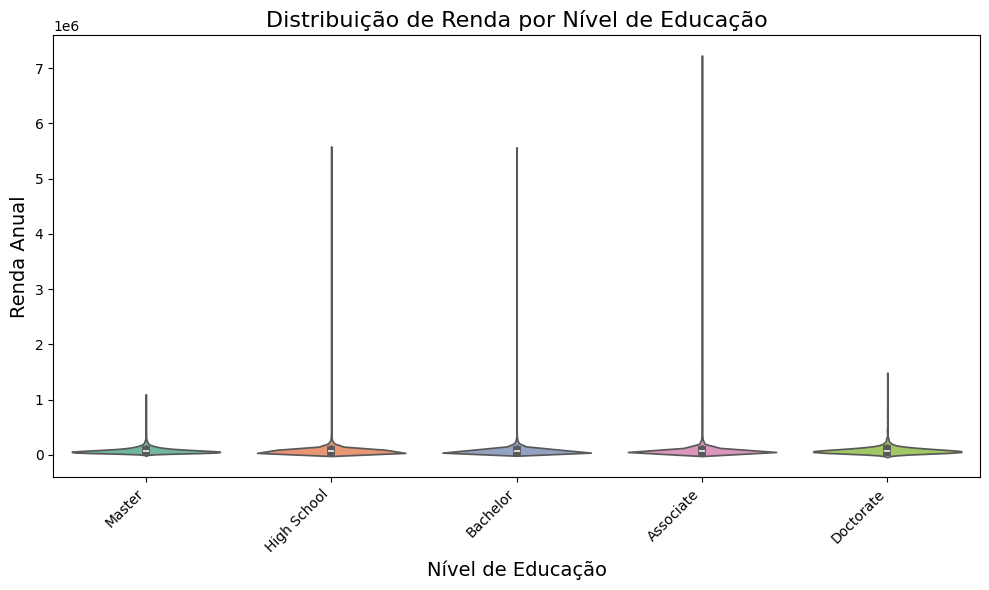

In [90]:
plt.figure(figsize=(10, 6))

# Criando o violinplot para visualizar a distribuição de person_income por cada categoria de person_education
sns.violinplot(data=df, x='person_education', y='person_income', palette='Set2')

# Adicionando título e rótulos
plt.title('Distribuição de Renda por Nível de Educação', fontsize=16)
plt.xlabel('Nível de Educação', fontsize=14)
plt.ylabel('Renda Anual', fontsize=14)

# Melhorando a visibilidade das labels
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [91]:
# Estatísticas descritivas de person_income por cada nível de person_education
education_income_stats = df.groupby('person_education')['person_income'].describe()

# Exibindo as estatísticas descritivas
print(education_income_stats)

                    count          mean           std     min       25%  \
person_education                                                          
Associate         12028.0  80641.623628  90097.704734  8000.0  46925.50   
Bachelor          13399.0  79703.319725  73348.223860  8000.0  47144.50   
Doctorate           621.0  87234.541063  87156.305015  9824.0  48882.00   
High School       11972.0  80224.597645  88693.791486  8000.0  47488.00   
Master             6980.0  80491.924355  56673.257138  8000.0  47164.75   

                      50%        75%        max  
person_education                                 
Associate         67053.0   95972.50  7200766.0  
Bachelor          67019.0   95531.00  5545545.0  
Doctorate         70434.0  102627.00  1440982.0  
High School       66898.0   94445.50  5556399.0  
Master            67860.0   96972.75  1080918.0  


Embora pessoas com doutorado não tenham as maiores rendam, elas são as que tem maior distribuição, tendo a maior média entre as categorias.

## **4.Tratamento dos Dados**

### 4.1.Missing

In [92]:
df.isna().sum().sum()

0

O dataset não possui missing

### 4.2.Matriz Correlacional

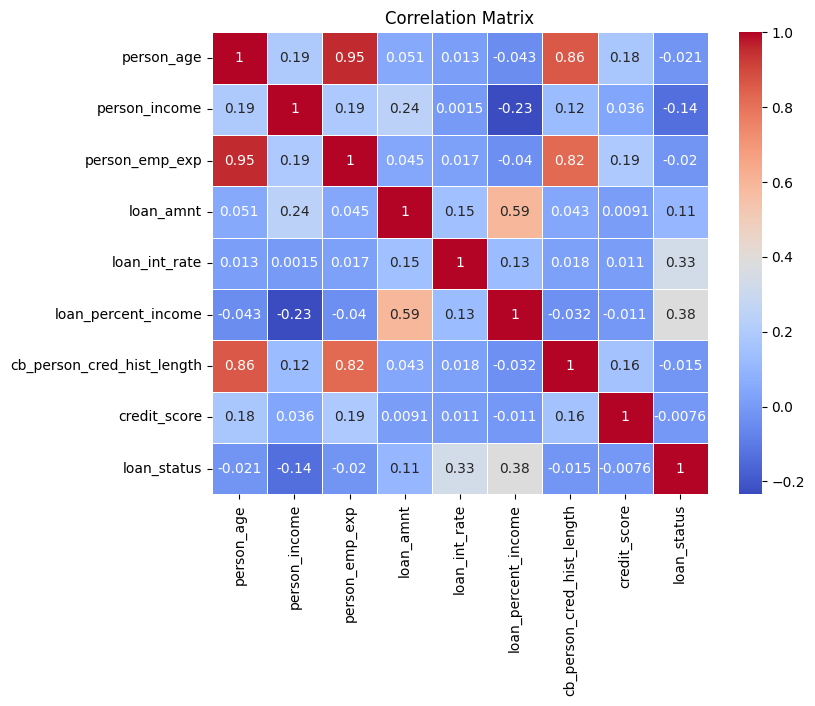

In [93]:
plt.figure(figsize=(8, 6))

numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Temos um correlação muito forte entre a idade e quantidade de anos de crédito, e também com o tempo de mercado de trabalho.

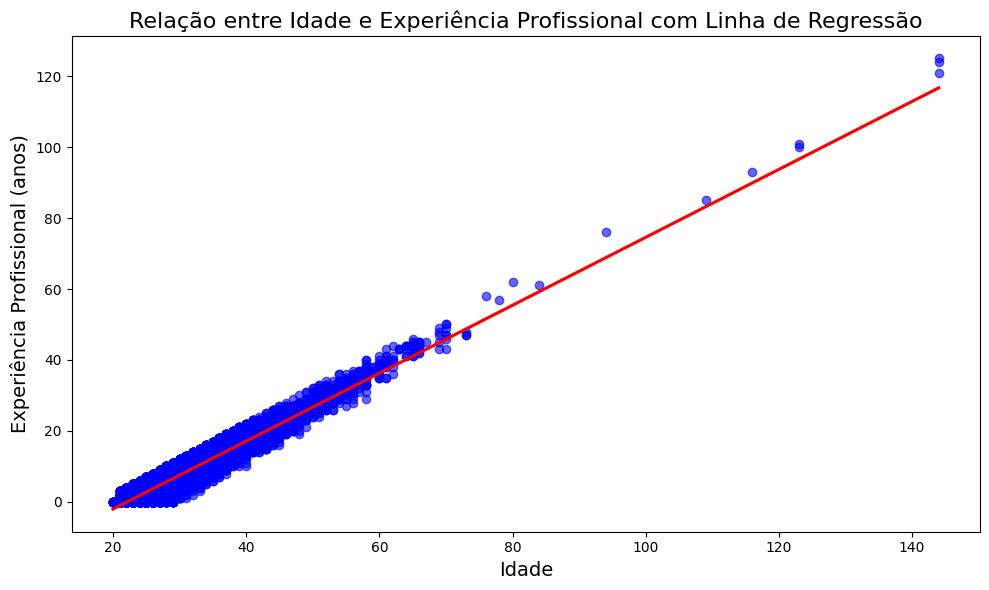

In [94]:
plt.figure(figsize=(10, 6))

# Criando o regplot para visualizar a relação entre person_age e person_emp_exp com linha de regressão
sns.regplot(data=df, x='person_age', y='person_emp_exp', scatter_kws={'color': 'b', 'alpha': 0.6}, line_kws={'color': 'red'})

# Adicionando título e rótulos
plt.title('Relação entre Idade e Experiência Profissional com Linha de Regressão', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Experiência Profissional (anos)', fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

* É altamente correlacionável, uma relação quase que extritamente linear.
* Tem outliers em ambas variáveis, o que pode indicar erro. Faremos esse tratamento.

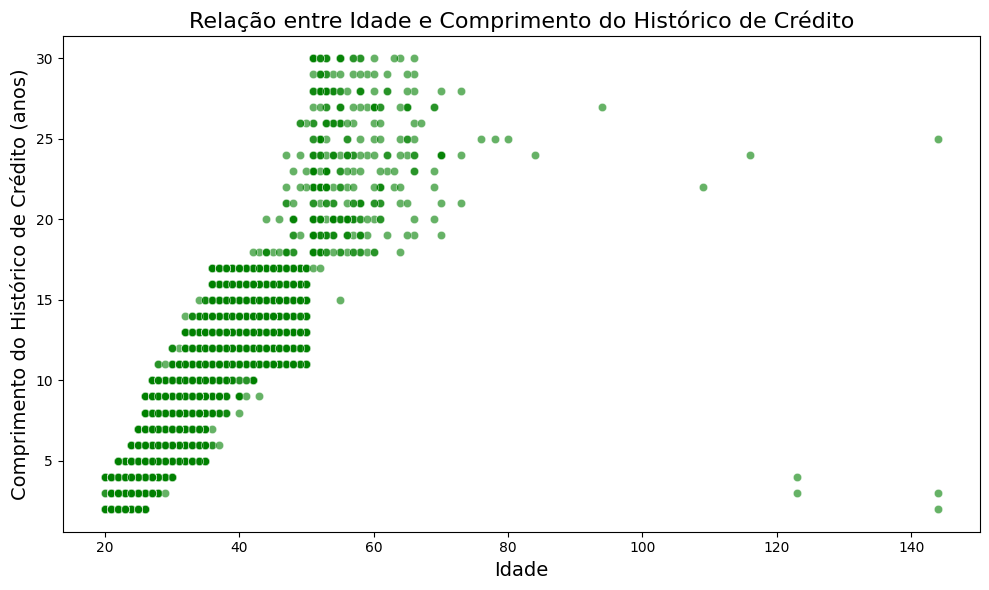

In [95]:
plt.figure(figsize=(10, 6))

# Criando o scatterplot para visualizar a relação entre person_age e cb_person_cred_hist_length
sns.scatterplot(data=df, x='person_age', y='cb_person_cred_hist_length', color='green', alpha=0.6)

# Adicionando título e rótulos
plt.title('Relação entre Idade e Comprimento do Histórico de Crédito', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Comprimento do Histórico de Crédito (anos)', fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Um efeito menor mas ainda assim bem linear.

Como idade tem correlação muito forte com essas duas variáveis, e pensando um pouco em como funciona análise de crédito, empréstimos, e afins, podemos deletar essa coluna, porque ela será muito pouco significativa para os nossos modelos.

In [96]:
df.drop('person_age', axis=1, inplace=True)

### 4.3.Removendo Outliers

In [97]:
cols = ['loan_int_rate', 'loan_amnt','loan_percent_income', 'cb_person_cred_hist_length']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

O **primeiro quartil** (Q1) representa o valor abaixo do qual 25% dos dados estão localizados, e o **terceiro quartil** (Q3) é o valor abaixo do qual 75% dos dados estão localizados. Portanto, o **intervalo interquartil** (IQR) é a diferença entre Q3 e Q1, que captura a "faixa central" dos dados.

O **intervalo interquartil** (IQR) é a diferença entre Q3 e Q1 e é usado para medir a dispersão dos dados. Ele ajuda a entender a "largura" dos dados centrais.


### 4.4.Transformações

#### 4.1.Normalização da Variável Nível Escolar

Podemos rankear de acordo com o nível de escolaridade

In [98]:
df['person_education'] = df['person_education'].replace({
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
})

<ipython-input-98-bb2f889f9acb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_education'] = df['person_education'].replace({
<ipython-input-98-bb2f889f9acb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_education'] = df['person_education'].replace({


#### 4.1.Dummies

In [99]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({
    'Yes': 1,
    'No': 0,
})

<ipython-input-99-290cfb781a03>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({
<ipython-input-99-290cfb781a03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({


In [100]:
# prompt: transforme as variáveis categóricas em dummies

# Create dummy variables for categorical features
categorical_cols = ['person_gender', 'loan_intent', 'person_home_ownership']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [101]:
df.columns

Index(['person_education', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'person_gender_male', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')

In [102]:
df.dtypes

,0
person_education,int64
person_income,float64
person_emp_exp,int64
loan_amnt,float64
loan_int_rate,float64
loan_percent_income,float64
cb_person_cred_hist_length,float64
credit_score,int64
previous_loan_defaults_on_file,int64
loan_status,int64


## **5.Modelagem**

### 5.1.Setando Função Com os Classificadores

Essa é uma função de produção para classificação utilizando diversos modelos, onde retorna todas as métricas importantes, e também o tempo de operação.

Esse código foi disponibilizado pelo o professor Elias Jabob para seus alunos da Universidade Federal do Rio Grande do Norte.

In [103]:
from typing import List, Tuple

def calculate_evaluation_metrics(y_true: pd.Series, y_pred: pd.Series) -> Tuple[float, float, float, str, float, np.ndarray]:
    """
    Calculate evaluation metrics for model predictions.

    Args:
        y_true (pd.Series): The true labels.
        y_pred (pd.Series): The predicted labels.

    Returns:
        Tuple[float, float, float, str, float, np.ndarray]: The calculated metrics including F1 score, balanced accuracy, accuracy, classification report, Matthews correlation coefficient, and confusion matrix.
    """
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='micro')
    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    # Generate classification report
    classification_report_str = classification_report(y_true, y_pred)
    # Calculate Matthews correlation coefficient
    matthews_corr_coeff = matthews_corrcoef(y_true, y_pred)
    # Generate confusion matrix
    confusion_matrix_arr = confusion_matrix(y_true, y_pred)

    return f1, balanced_accuracy, accuracy, classification_report_str, matthews_corr_coeff, confusion_matrix_arr

def train_and_evaluate_models(X_train: pd.DataFrame, y_train: pd.Series, X_valid: pd.DataFrame, y_valid: pd.Series, n_jobs: int = -1) -> Tuple[pd.DataFrame, List[List]]:
    """
    Train multiple models and evaluate their performance.

    Args:
        X_train (pd.DataFrame): The training data.
        y_train (pd.Series): The training labels.
        X_valid (pd.DataFrame): The validation data.
        y_valid (pd.Series): The validation labels.
        n_jobs (int, optional): The number of jobs to run in parallel. Defaults to -1.

    Returns:
        Tuple[pd.DataFrame, List[List]]: A dataframe of the evaluation results and a list of classification reports.
    """
    # Define the models to be trained
    models = [
        ('Calibrated-LSVC', CalibratedClassifierCV(LinearSVC(random_state=271828, class_weight='balanced', dual='auto'))),
        ('LR', LogisticRegression(random_state=271828, n_jobs=n_jobs, class_weight='balanced')),
        ('RF', RandomForestClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced')),
        ('LGBM', LGBMClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced', verbose=-1)),
        ('XGB', XGBClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced', verbosity=0)),
        ('MLP', MLPClassifier(random_state=271828)),
        ('SGD', SGDClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced')),
        ('NB', MultinomialNB()),
        ('LSVC', LinearSVC(random_state=271828, class_weight='balanced', dual='auto')),
        ('KNN', KNeighborsClassifier(n_jobs=n_jobs)),
        ('DT', DecisionTreeClassifier(random_state=271828, class_weight='balanced')),
        ('ExtraTrees', ExtraTreesClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced'))
    ]

    evaluation_results = []
    classification_reports = []

    # Train each model and evaluate its performance
    for model_name, model in models:
        start_time = time.time()  # Record the start time

        try:
            # Train the model
            model.fit(X_train, y_train)
            # Make predictions on the validation set
            predictions = model.predict(X_valid)
        except Exception as e:
            # Handle any exceptions that occur during training or prediction
            print(f'Error {model_name} - {e}')
            continue

        # Calculate evaluation metrics
        f1, balanced_accuracy, accuracy, classification_report_str, matthews_corr_coeff, confusion_matrix_arr = calculate_evaluation_metrics(y_valid, predictions)
        # Store the classification report and confusion matrix
        classification_reports.append([model_name, classification_report_str, confusion_matrix_arr])

        elapsed_time = time.time() - start_time  # Calculate the elapsed time
        # Append the evaluation results
        evaluation_results.append([model_name, f1, balanced_accuracy, accuracy, matthews_corr_coeff, elapsed_time, confusion_matrix_arr, classification_report_str])

        # Print the evaluation results
        print(f'Name: {model_name} - F1: {f1:.4f} - BACC: {balanced_accuracy:.4f} - ACC: {accuracy:.4f} - MCC: {matthews_corr_coeff:.4f} - Elapsed: {elapsed_time:.2f}s')
        print(classification_report_str)
        print(confusion_matrix_arr)
        print('*' * 20, '\n')

    # Create a DataFrame to store the evaluation results
    results_df = pd.DataFrame(evaluation_results, columns=['Model', 'F1', 'BACC', 'ACC', 'MCC', 'Total Time', 'Confusion Matrix', 'Classification Report'])
    # Convert the confusion matrix to a string for better readability in the DataFrame
    results_df['Confusion Matrix'] = results_df['Confusion Matrix'].apply(lambda x: str(x))

    return results_df, classification_reports

### 5.2.Separando em Treino, Teste e Validação

In [104]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Dividindo os dados em treino, validação e teste (60% treino, 20% validação, 20% teste)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [105]:
df_results, creports = train_and_evaluate_models(X_train, y_train, X_val, y_val, n_jobs=-1)

Name: Calibrated-LSVC - F1: 0.8823 - BACC: 0.8149 - ACC: 0.8823 - MCC: 0.6322 - Elapsed: 1.13s
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6512
           1       0.71      0.70      0.71      1638

    accuracy                           0.88      8150
   macro avg       0.82      0.81      0.82      8150
weighted avg       0.88      0.88      0.88      8150

[[6041  471]
 [ 488 1150]]
******************** 

Name: LR - F1: 0.7528 - BACC: 0.7687 - ACC: 0.7528 - MCC: 0.4471 - Elapsed: 2.10s
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      6512
           1       0.44      0.80      0.56      1638

    accuracy                           0.75      8150
   macro avg       0.69      0.77      0.70      8150
weighted avg       0.84      0.75      0.77      8150

[[4832 1680]
 [ 335 1303]]
******************** 

Name: RF - F1: 0.9265 - BACC: 0.8549 - ACC: 0.9265 - MCC: 0.7608 - El

### **6.Resultados**

### 6.1.Melhor Modelo

In [106]:
df_results.sort_values(by='MCC', ascending=False).iloc[:,0:6]

,Model,F1,BACC,ACC,MCC,Total Time
4,XGB,0.927485,0.871003,0.927485,0.767894,0.429808
2,RF,0.926503,0.854852,0.926503,0.760752,4.680875
3,LGBM,0.897669,0.902151,0.897669,0.728570,0.596059
11,ExtraTrees,0.916074,0.840787,0.916074,0.726598,1.940151
10,DT,0.892393,0.831679,0.892393,0.664424,0.246047
0,Calibrated-LSVC,0.882331,0.814874,0.882331,0.632217,1.125058
8,LSVC,0.817055,0.865414,0.817055,0.609286,0.218566
9,KNN,0.841350,0.704695,0.841350,0.460618,1.647972
1,LR,0.752761,0.768749,0.752761,0.447141,2.098713
6,SGD,0.812638,0.677818,0.812638,0.380995,0.378831


* MCC é um métrica que leva em consideração tanto os falso positivos quanto os falsos negativos. Ideal para base de dados desbalanceadas.
* O melhor método foi o XGB, que é um modelo baseado em Gradient Boosting, conhecido por sua alta performance em tarefas de classificação. Ele utiliza múltiplos classificadores fracos, que são ajustados sequencialmente para corrigir os erros dos anteriores.

### 6.2.Passando a Base de Teste no Modelo

In [117]:
#Instanciando o mesmo modelo
best_model = XGBClassifier(random_state=271828, n_jobs=-1, class_weight='balanced', verbosity=0)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
# Calculando as métricas
f1 = f1_score(y_test, y_pred, average='weighted')
bacc = balanced_accuracy_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
# Exibir os resultados
print(f"F1 Score (weighted): {f1:.2f}")
print(f"Balanced Accuracy: {bacc:.2f}")
print(f"Accuracy: {acc:.2f}")
print(f"Matthews Correlation Coefficient(MCC): {mcc:.2f}")

F1 Score (weighted): 0.93
Balanced Accuracy: 0.88
Accuracy: 0.93
Matthews Correlation Coefficient(MCC): 0.78


## 7.**Conclusões**

* Tivemos resultados bons utilizando XBG como classificador, 93% de F1-Score, numa base desbalanceada, é um bom sinal.
* O que podemos fazer para obtermos métricas melhores é fazer um tuning de hiperparâmetros.